# Basic_Preprocessing

이미지 처리를 위한 라이브러리
- opencv : CV2
- PIL  
이미지 불러오기, 저장하기, 전처리, 시각화 등 다양한 이미지처리 기능을 지원한다.

이미지를 불러오고 저장하려면  
이미지 경로를 활용해야한다. -> os, glob 라이브러리 활용  


> 어느 위치에 있는 이미지를 불러올 것인지, 이미지를 어느 위치에 저장할 것인지 명시




In [1]:
import cv2
import os

import numpy as np
from matplotlib import pyplot as plt

## Download sample data
basic 수업을 위해서, 샘플 이미지 3장을 gdown해보자.
- gdown : google drive에 저장되어있는 파일을 다운로드받기

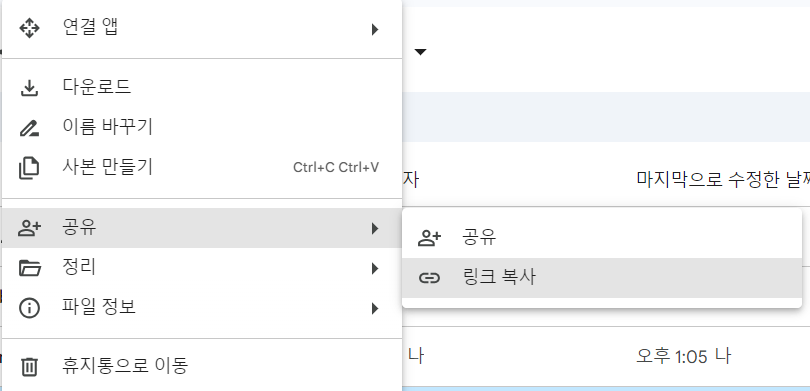

아래 링크에서
> [https://drive.google.com/file/d/1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ/view?usp=drive_link](https://drive.google.com/file/d/1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ/view?usp=drive_link)

  
  

/d/ 뒤에 있는 암호키를 발췌하여
> 1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ
  
  
gdown 명령에 넣어주면 된다.

> !gdown 1GoyVfXu_P-Gt4DQVOLFMzjTHrPb2zvNZ





In [2]:
!pip install gdown==v4.6.3

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


In [3]:
!gdown 1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6

Downloading...
From: https://drive.google.com/uc?id=1EVDm6wR2E2ukbW3u17VKaGWk5XkDedX6
To: /content/imgset_mini.zip
100% 83.2k/83.2k [00:00<00:00, 135MB/s]


레포지토리를 확인하면 imgset_mini.zip 파일에 생긴 것을 확인할 수 있다.  
zip파일 압축 해제를 해주자.
압축해제 명령어는 !unzip이다.

> !unzip 파일명





In [4]:
!unzip imgset_mini.zip

Archive:  imgset_mini.zip
  inflating: airplane.jpg            
  inflating: car.jpg                 
  inflating: dog.jpg                 


airplane.jpg, car.jpg, dog.jpg 3개의 파일이 생긴 것을 확인할 수 있다.

## 이미지 파일 불러오기
레포지토리에 있는 이미지파일을 불러오려면,  
이미지파일의 경로가 필요하다.  
cv2를 이용하여, 이미지파일의 경로를 명시하면 이미지파일을 불러와서 변수에 저장할 수 있다.

In [5]:
img_path = '/content/airplane.jpg'

In [7]:
# cv2.imread : 이미지파일 불러오기
img = cv2.imread(img_path)

img

원본데이터와 색상이 다르다.  
원본데이터의 색상이 BGR로 채널이 변경되어 출력되었기 때문이다.  
이를 원본처럼 출력되도록 수정하려면, 아래와 같이 BGR을 RGB로 변경해주면 된다.

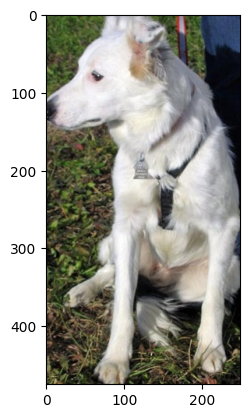

In [ ]:
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Resize
224 x 224 로 사이즈를 바꾸자.  
1) 긴 변을 원하는 길이(224)에 맞춰서, 이미지의 크기를 resize해준다.  
ex) 110x275 --> 90x224   
2) 짧은 변을 패딩작업으로 원하는 길이로 바꿔준다.

### 파일 1개 resize하기

In [ ]:
img = cv2.imread(img_path)
img.shape

(110, 275, 3)

(90, 224, 3)

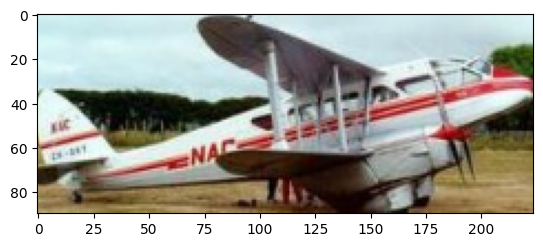

In [ ]:
# 이미지의 width와 height 중 긴 쪽을 img_size에 맞추기
target_size = 224

# 둘 중 큰 값을 target_size와 ratio 계산
if(img.shape[1] > img.shape[0]) : # 열 > 행
    ratio = target_size/img.shape[1] # 비율 = 224/열
else :
    ratio = target_size/img.shape[0] # 비율 = 224/행

# 현재 케이스 : ratio = 대략 0.81

# cv2.resize함수를 활용하면 ratio를 입력하여 원하는 사이즈로 resize 가능
img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

cv2.resize
- dsize : dsize에 원하는 사이즈를 입력하거나,
- fx, fy : dsize에 (0,0)주고, fx, fy에 비율을 입력하면 원하는 사이즈로 resize할 수 있다.
- interpolation : 크기를 변경할 때 어떤 보간법을 쓸지 정할 수 있다.
    1. cv2.INTER_NEAREST - 최근방 이웃 보간법 : 가장 빠르지만 퀄리티가 많이 떨어져 잘 쓰이지 않습니다.

    2. cv2.INTER_LINEAR - 양선형 보간법(2x2 이웃 픽셀 참조) : 속도도 빠르고 퀄리티도 적당하다.

    3. cv2.INTER_CUBIC - 3차회선 보간법(4x4 이웃 픽셀 참조) : cv2.INTER_LINEAR 보다 느리지만 퀄리티는 더 좋다.

    4. cv2.INTER_LANCZOS4 - Lanczos 보간법 (8x8 이웃 픽셀 참조) : 좀더 복잡해서 오래 걸리지만 퀄리티는 좋다.

    5. cv2.INTER_AREA - 영상 축소시 효과적 : 영역적인 정보를 추출해서 결과 영상을 셋팅

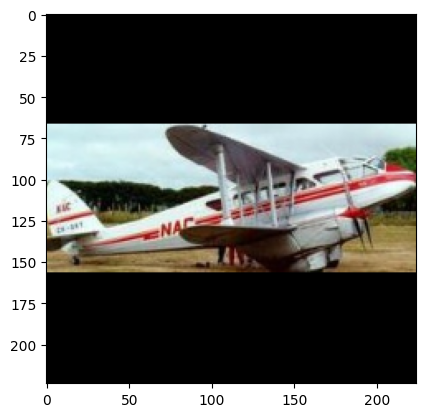

In [ ]:
# 짧은 변쪽에 패딩 처리하여 정방형으로 resize하기

# 90x224 : 90 -> h. 224 -> w
w, h = img.shape[1], img.shape[0]

# 패딩 길이 계산 = (긴 변 길이 - 짧은 변 길이) / 2
# * 어차피 긴변은 target size 와 동일하기 때문에
# * 둘 다 target_size와의 차이를 계산한다.
dw = (target_size - w)/2 # target_size와 w의 차이
dh = (target_size - h)/2 # target_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

#### 직접 해보기
1) 자동차 사진 불러와서, 위와 동일하게 resize 수행


2) 강아지 사진 불러와서, 448, 448 이미지로 리사이즈해보기


#### 정답

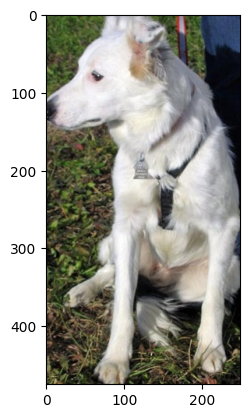

In [ ]:
# 위와 같은 방법으로 비율 유지하여 보간법으로 크기 조정 - 패딩으로 정사각형
img_path = '/content/dog.jpg'

img = cv2.imread(img_path)

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(448, 235, 3)

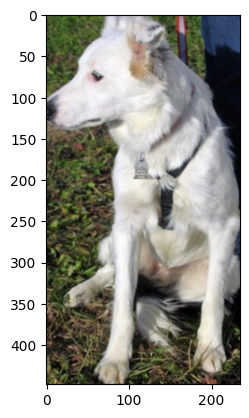

In [ ]:
img_size = 448

if(img.shape[1] > img.shape[0]) :
    ratio = img_size/img.shape[1]
else :
    ratio = img_size/img.shape[0]

img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

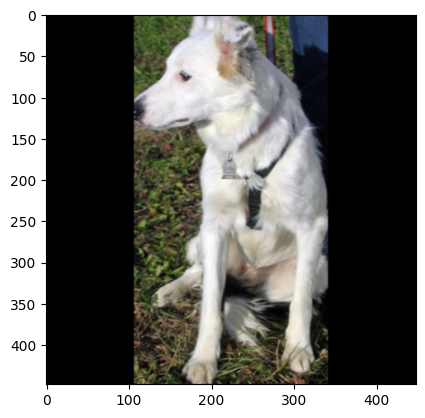

In [ ]:
w, h = img.shape[1], img.shape[0]

dw = (img_size-w)/2 # img_size와 w의 차이
dh = (img_size-h)/2 # img_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (448, 448)) #이동변환

cv2.imwrite('resized_img.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

### 파일 여러개 resize하기

#### 직접해보기
- resized라는 이름의 폴더를 만들어, resize한 파일들을 저장해보자.

In [ ]:
# 폴더 생성
os.mkdir('resized')

In [ ]:
# img_path 순회하면서 코드 반복
# 불러오기 -> resize -> 저장하기
for filename in ['airplane', 'car', 'dog']:
    img_path = '/content/'+filename+'.jpg'
    print(img_path)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
!pwd

/content


array([[[ 31,  97,  72],
        [ 34, 100,  75],
        [ 29,  91,  67],
        ...,
        [109,  69,  50],
        [102,  62,  43],
        [100,  60,  41]],

       [[ 42, 107,  82],
        [ 46, 111,  85],
        [ 42, 104,  80],
        ...,
        [110,  70,  51],
        [104,  64,  45],
        [101,  61,  42]],

       [[ 46, 109,  83],
        [ 53, 114,  86],
        [ 53, 114,  88],
        ...,
        [110,  70,  51],
        [106,  66,  47],
        [102,  62,  43]],

       ...,

       [[ 71,  94,  96],
        [ 76, 100, 100],
        [ 74,  95,  97],
        ...,
        [ 14,  19,  22],
        [ 15,  20,  23],
        [  0,   4,   7]],

       [[ 82, 104, 102],
        [ 57,  79,  77],
        [ 29,  51,  49],
        ...,
        [ 27,  32,  35],
        [ 26,  31,  34],
        [ 16,  21,  24]],

       [[ 21,  43,  38],
        [  7,  30,  25],
        [  4,  27,  22],
        ...,
        [ 32,  37,  40],
        [ 26,  31,  34],
        [ 20,  27,  30]]], dtype=uint8)
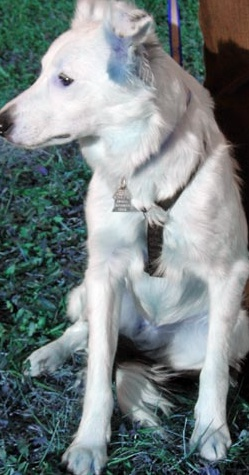

In [ ]:
img = cv2.imread(img_path)
img

In [ ]:
img = cv2.imread(img_path)
img.shape

(475, 249, 3)

(224, 117, 3)

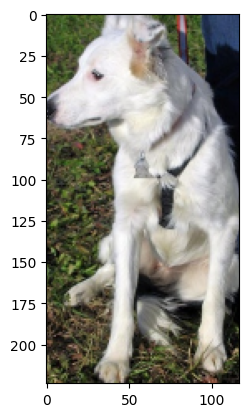

In [ ]:
# 이미지의 width와 height 중 긴 쪽을 img_size에 맞추기
target_size = 224

# 둘 중 큰 값을 target_size와 ratio 계산
if(img.shape[1] > img.shape[0]) : # 열 > 행
    ratio = target_size/img.shape[1] # 비율 = 224/열
else :
    ratio = target_size/img.shape[0] # 비율 = 224/행

# 현재 케이스 : ratio = 대략 0.81

# cv2.resize함수를 활용하면 ratio를 입력하여 원하는 사이즈로 resize 가능
img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img.shape

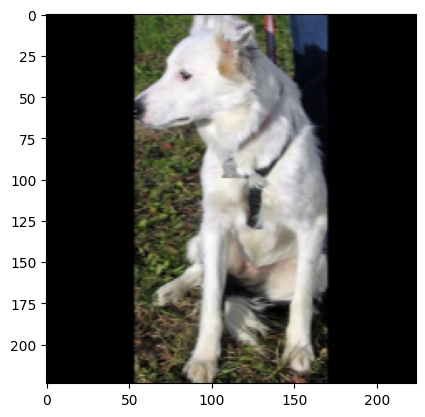

In [ ]:
# 짧은 변쪽에 패딩 처리하여 정방형으로 resize하기

# 90x224 : 90 -> h. 224 -> w
w, h = img.shape[1], img.shape[0]

# 패딩 길이 계산 = (긴 변 길이 - 짧은 변 길이) / 2
# * 어차피 긴변은 target size 와 동일하기 때문에
# * 둘 다 target_size와의 차이를 계산한다.
dw = (target_size - w)/2 # target_size와 w의 차이
dh = (target_size - h)/2 # target_size와 h의 차이

M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

cv2.imwrite(f'/content/resized/{filename}.jpg' , img_re)

plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

In [ ]:
!pwd

/content


#### 정답

In [ ]:
images = [] # resize img 저장

for filename in ['airplane', 'car', 'dog']:
    # img_path 순회하면서 코드 반복
    img_path = '/content/'+filename+'.jpg'
    print(img_path)
    img = cv2.imread(img_path)
    img_size = 224

    if(img.shape[1] > img.shape[0]) :
        ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (224, 224)) #이동변환

    # 저장하는 파일명도 filename에 따라 변환
    cv2.imwrite(f'/content/resized/{filename}.jpg', img_re) # filename : 이미지 파일 이름
    images.append(img_re)

/content/airplane.jpg
/content/car.jpg
/content/dog.jpg


In [ ]:
images

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[ 20,  26,  25],
         [ 20,  26,  25],
         [ 21,  27,  26],
         ...,
         [203, 212, 215],
         [203, 212, 215],
      

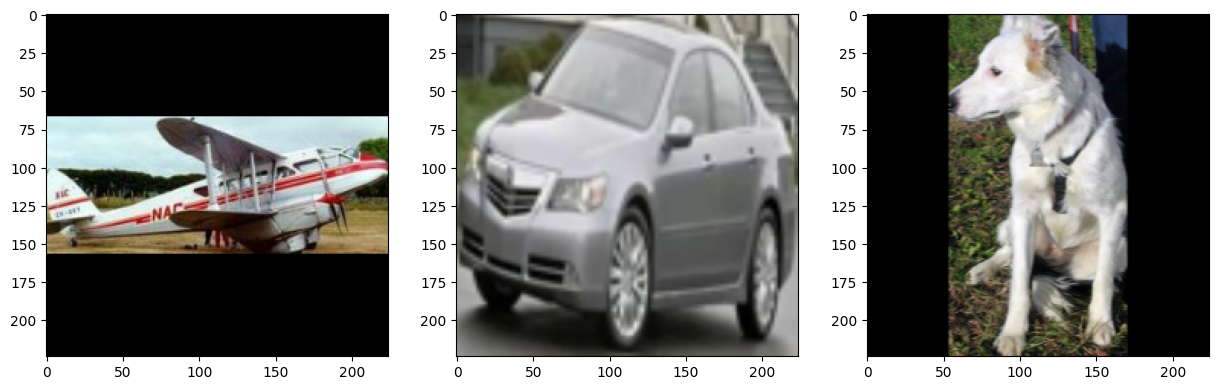

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Zero Centering

이미지들의 평균 이미지를 계산하자.

In [ ]:
compute_mean = lambda imgs : np.mean(imgs, axis=0)

# 함수명 = lambda 입력 : 출력

In [ ]:
images # 3 x 224x224x3

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[ 20,  26,  25],
         [ 20,  26,  25],
         [ 21,  27,  26],
         ...,
         [203, 212, 215],
         [203, 212, 215],
      

In [ ]:
mean_img = compute_mean(images) # 3, 224, 224, 3 -> 224, 224, 3

In [ ]:
mean_img.shape

(224, 224, 3)

In [ ]:
mean_img

array([[[ 6.66666667,  8.66666667,  8.33333333],
        [ 6.66666667,  8.66666667,  8.33333333],
        [ 7.        ,  9.        ,  8.66666667],
        ...,
        [67.66666667, 70.66666667, 71.66666667],
        [67.66666667, 70.66666667, 71.66666667],
        [67.66666667, 70.66666667, 71.66666667]],

       [[ 7.33333333,  9.33333333,  9.        ],
        [ 7.33333333,  9.33333333,  9.        ],
        [ 7.66666667,  9.66666667,  9.33333333],
        ...,
        [66.66666667, 69.66666667, 70.66666667],
        [68.        , 71.        , 72.        ],
        [68.66666667, 71.66666667, 72.66666667]],

       [[ 9.        , 11.        , 10.66666667],
        [ 9.        , 11.        , 10.66666667],
        [ 9.        , 11.        , 10.66666667],
        ...,
        [63.66666667, 66.66666667, 67.66666667],
        [69.        , 72.        , 73.        ],
        [71.        , 74.        , 75.        ]],

       ...,

       [[49.        , 49.        , 49.        ],
        [48

In [ ]:
zero_centered_images = images - mean_img

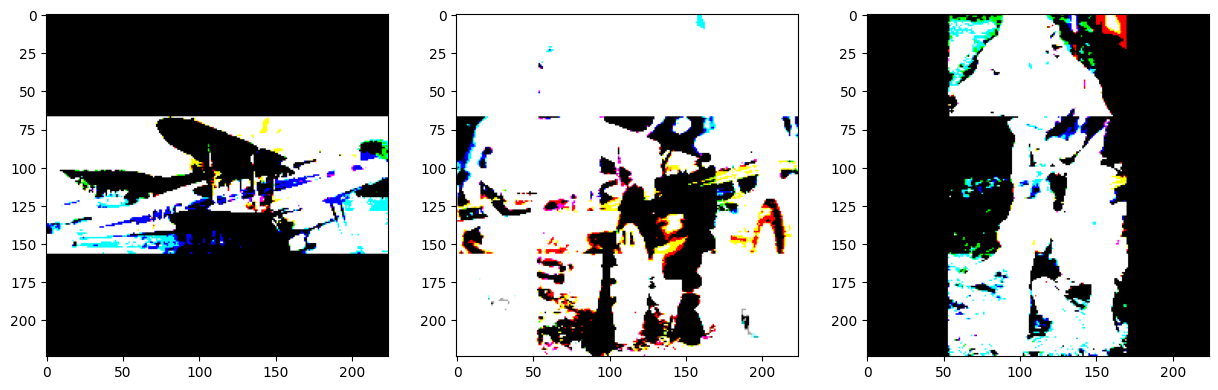

In [ ]:
plt.figure(figsize=(15,5))

for idx, zc_img in enumerate(zero_centered_images):
    plt.subplot(1,3,idx+1)
    plt.imshow(zc_img)

## Grayscaling & Binarization

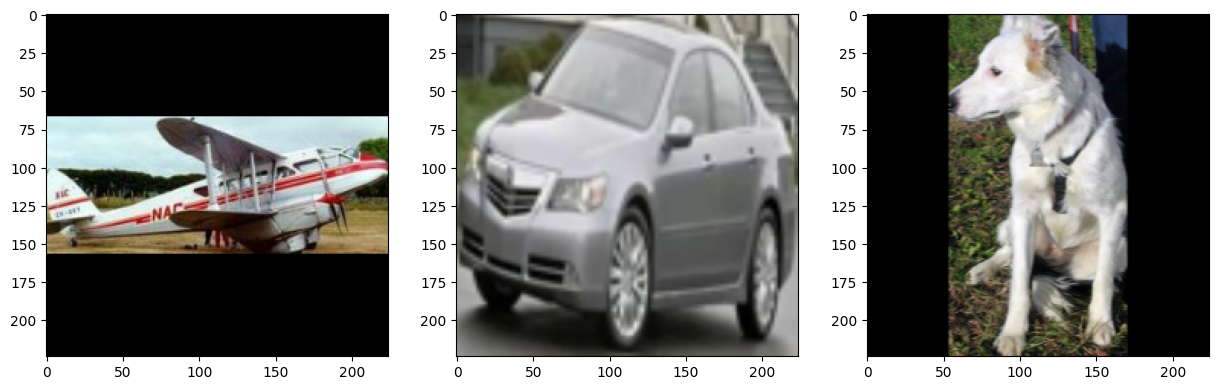

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_imgs = []
for img in images:
    gray_imgs.append(grayscale(img))

# 리스트를 만들 때, 그 코드가 단순하다면 내포용법으로
gray_imgs = [grayscale(img) for img in images]

In [ ]:
gray_imgs = [grayscale(img) for img in images]
gray_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 25,  25,  26, ..., 212, 212, 212],
        [ 27,  27,  28, ..., 209, 213, 215],
        [ 32,  32,  32, ..., 200, 216, 222],
        ...,
        [147, 146, 144, ..., 163, 165, 166],
        [148, 148, 146, ..., 162, 164, 165],
        [149, 148, 146, ..., 162, 164, 165]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [ ]:
gray_imgs[0].shape

(224, 224)

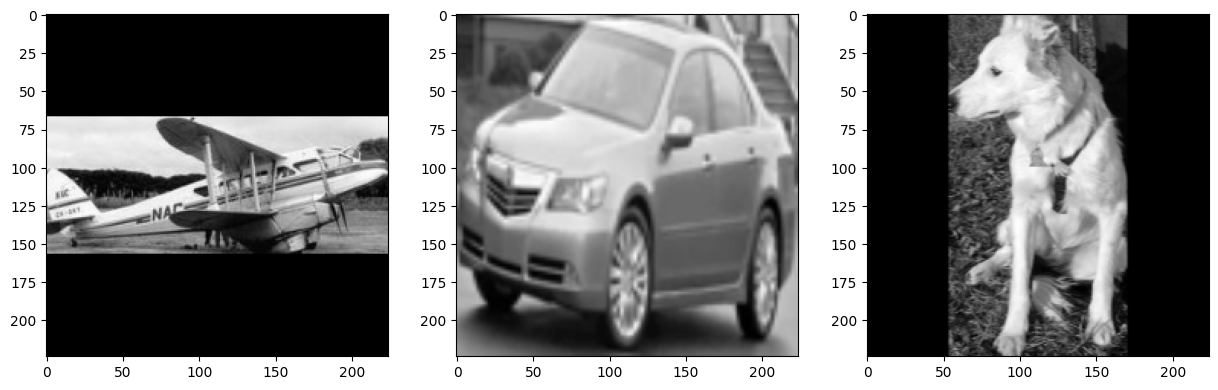

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(gray_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [ ]:
thresh = 127.5
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

In [ ]:
bin_imgs = [binarization(img)[1] for img in gray_imgs]
bin_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

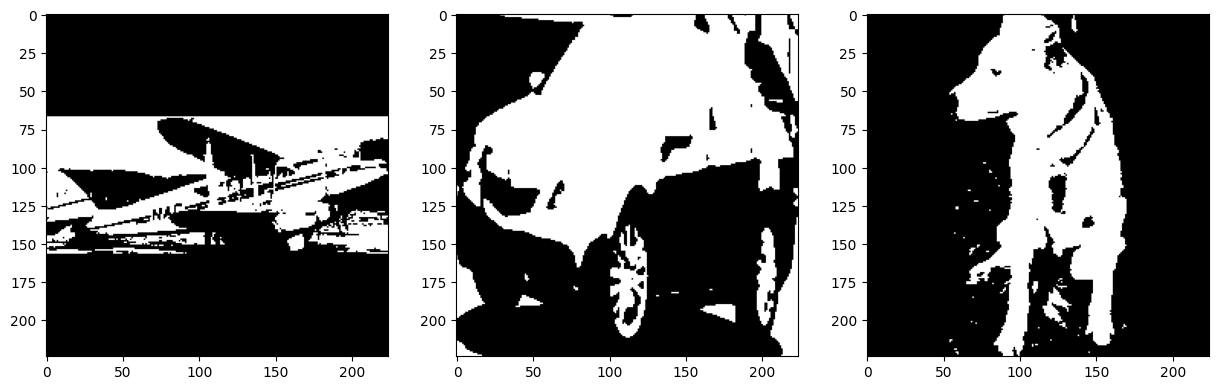

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(bin_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

#### 문제
아래 순서로 수행하는 함수를 각각 선언하고, 수행해보시오.
1. 리사이즈 -> grayscaling -> zero-centering  
2. 리사이즈 -> 이진화 -> zero-centering

In [ ]:
#입력 받아서 수행하는 함수 적용
#아래 순서로 수행하는 함수를 각각 선언하고, 수행해보시오.

#리사이즈 -> grayscaling -> zero-centering
#리사이즈 -> 이진화 -> zero-centering

In [ ]:
import cv2
import os

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def resize():
    images = []
    target_size = 224

    for filename in ['airplane', 'car', 'dog']:
        img_path = '/content/'+filename+'.jpg'

    img = cv2.imread(img_path)

    if(img.shape[1] > img.shape[0]) :
        ratio = target_size/img.shape[1]
    else :
        ratio = target_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img.shape

    w, h = img.shape[1], img.shape[0]

    dw = (target_size - w)/2
    dh = (target_size - h)/2

    M = np.float32([[1,0,dw], [0,1,dh]])
    img_re = cv2.warpAffine(img, M, (224, 224))

    cv2.imwrite(f'/content/resized/{filename}.jpg' , img_re)

    img_normalized = np.clip(img_re, 0, 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_normalized, cv2.COLOR_BGR2RGB))
    #plt.imshow(cv2.cvtColor(img_re, cv2.COLOR_BGR2RGB))

def grayscaling():
    images
    plt.figure(figsize=(15,5))

    for idx, img in enumerate(images):
        plt.subplot(1,3,idx+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_imgs = []
    for img in images:
        gray_imgs.append(grayscale(img))

    gray_imgs = [grayscale(img) for img in images]
    gray_imgs

def zero_centering():
    compute_mean = lambda imgs : np.mean(imgs, axis=0)
    images
    mean_img = compute_mean(images)
    mean_img.shape
    mean_img
    zero_centered_images = images - mean_img
    plt.figure(figsize=(15,5))

    for idx, zc_img in enumerate(zero_centered_images):
        plt.subplot(1,3,idx+1)
        plt.imshow(zc_img)

def binarization():
    thresh = 127.5
    binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    bin_imgs = [binarization(img)[1] for img in gray_imgs]
    bin_imgs
    plt.figure(figsize=(15,5))

    for idx, img in enumerate(bin_imgs):
        plt.subplot(1,3,idx+1)
        plt.imshow(img, cmap='gray')

In [ ]:
resize()
grayscaling()
zero_centering()

NameError: name 'cv2' is not defined

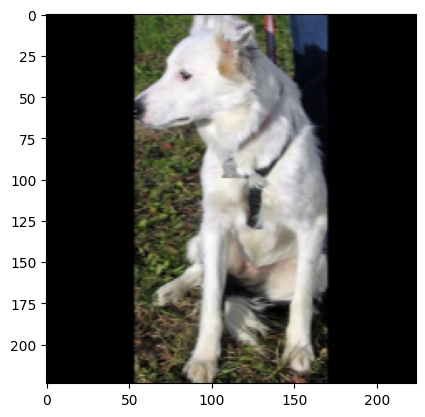

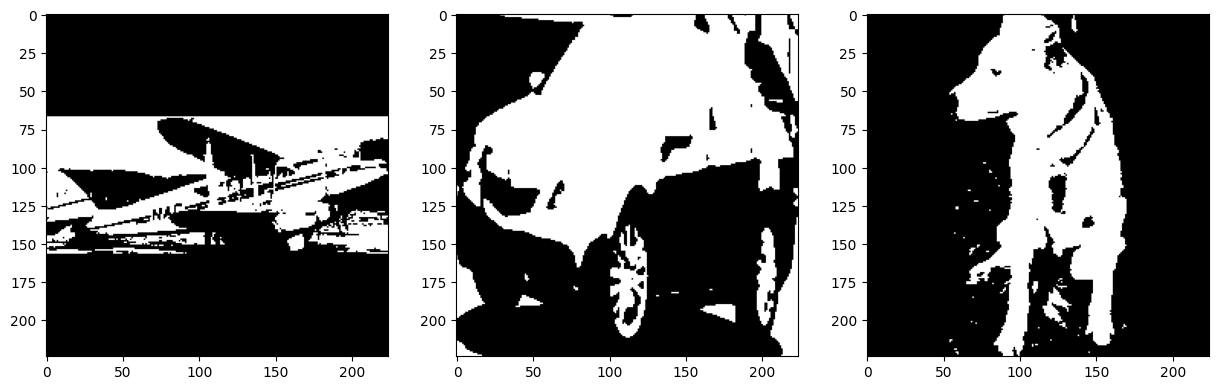

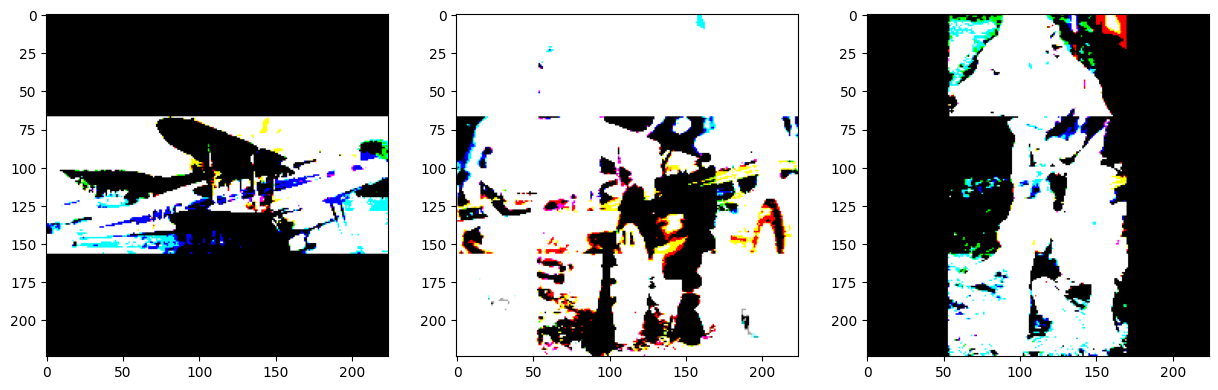

In [ ]:
resize()
binarization()
zero_centering()

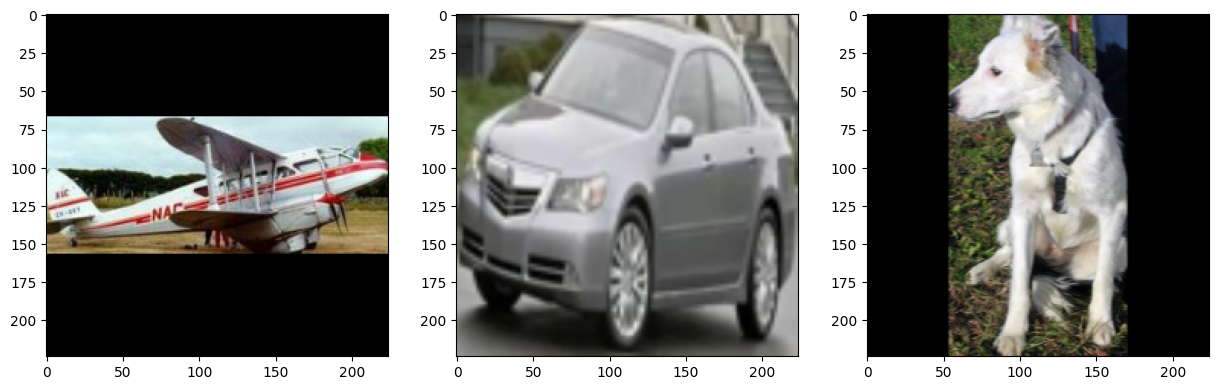

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(images):
    plt.subplot(1,3,idx+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_imgs = []
for img in images:
    gray_imgs.append(grayscale(img))

# 리스트를 만들 때, 그 코드가 단순하다면 내포용법으로
gray_imgs = [grayscale(img) for img in images]

In [ ]:
gray_imgs = [grayscale(img) for img in images]
gray_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 25,  25,  26, ..., 212, 212, 212],
        [ 27,  27,  28, ..., 209, 213, 215],
        [ 32,  32,  32, ..., 200, 216, 222],
        ...,
        [147, 146, 144, ..., 163, 165, 166],
        [148, 148, 146, ..., 162, 164, 165],
        [149, 148, 146, ..., 162, 164, 165]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

In [ ]:
gray_imgs[0].shape

(224, 224)

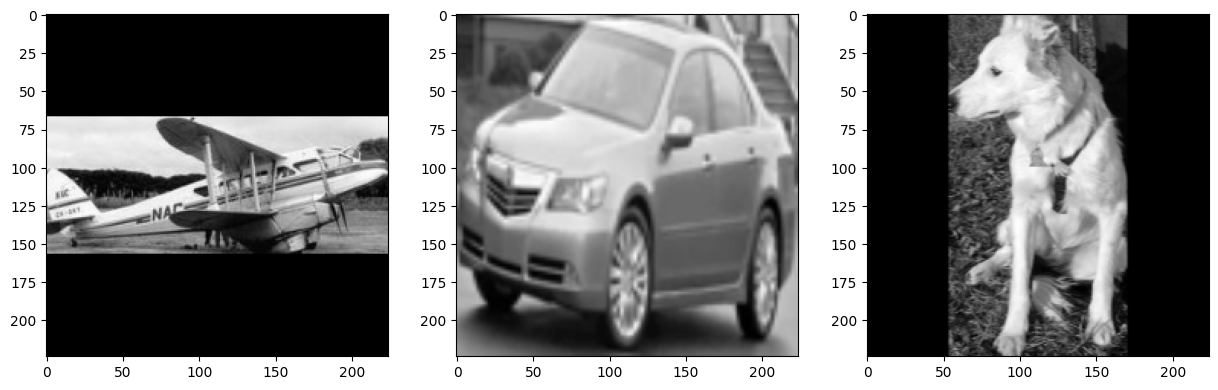

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(gray_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [ ]:
thresh = 127.5
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

In [ ]:
bin_imgs = [binarization(img)[1] for img in gray_imgs]
bin_imgs

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

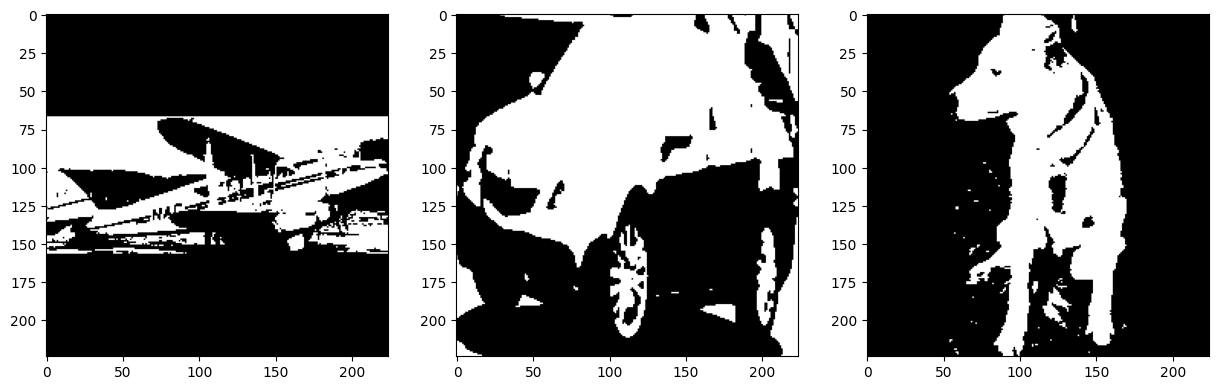

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(bin_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

In [ ]:
thresh = 127

In [ ]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:

def img_preprocess_with_gray(img_paths, img_size=224):
    images = [] # resize img 저장
    ##################################
    # 리사이즈
    ##################################
    for img_path in img_paths:
        # img_path 순회하면서 코드 반복
        print(img_path)
        img = cv2.imread(img_path)

        if(img.shape[1] > img.shape[0]) :
            ratio = img_size/img.shape[1]
        else :
            ratio = img_size/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

        # 그림 주변에 검은색으로 칠하기
        w, h = img.shape[1], img.shape[0]

        dw = (img_size-w)/2 # img_size와 w의 차이
        dh = (img_size-h)/2 # img_size와 h의 차이

        M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (img_size, img_size)) #이동변환

        images.append(img_re)

    ##################################
    # 그레이스케일
    ##################################
    gray_imgs = []
    for img in images:
        gray_imgs.append(grayscale(img))

    # 리스트를 만들 때, 그 코드가 단순하다면 내포용법으로
    gray_imgs = [grayscale(img) for img in images]

    ##################################
    # 제로센터링
    ##################################
    mean_img = compute_mean(gray_imgs) # 3, 224, 224, 3 -> 224, 224, 3
    preprocessed_imgs = gray_imgs - mean_img
    return preprocessed_imgs

In [ ]:
def img_preprocess_with_bin(img_paths, img_size=224):
    images = [] # resize img 저장
    ##################################
    # 리사이즈
    ##################################
    for img_path in img_paths:
        # img_path 순회하면서 코드 반복
        print(img_path)
        img = cv2.imread(img_path)

        if(img.shape[1] > img.shape[0]) :
            ratio = img_size/img.shape[1]
        else :
            ratio = img_size/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

        # 그림 주변에 검은색으로 칠하기
        w, h = img.shape[1], img.shape[0]

        dw = (img_size-w)/2 # img_size와 w의 차이
        dh = (img_size-h)/2 # img_size와 h의 차이

        M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (img_size, img_size)) #이동변환

        images.append(img_re)

    ##################################
    # 이진화
    ##################################
    gray_imgs = []
    for img in images:
        gray_imgs.append(grayscale(img))

    gray_imgs = [grayscale(img) for img in images]
    bin_imgs = [binarization(img)[1] for img in gray_imgs]

    ##################################
    # 제로센터링
    ##################################
    mean_img = compute_mean(bin_imgs) # 3, 224, 224, 3 -> 224, 224, 3
    preprocessed_imgs = gray_imgs - mean_img
    return preprocessed_imgs

In [ ]:
import glob

In [ ]:
img_paths = glob.glob('/content/*.jpg')
img_paths

['/content/dog.jpg',
 '/content/car.jpg',
 '/content/airplane.jpg',
 '/content/resized_img.jpg']

In [ ]:
img_preprocess_with_gray(img_paths, img_size=224)

/content/dog.jpg
/content/car.jpg
/content/airplane.jpg
/content/resized_img.jpg


array([[[ -6.25,  -6.25,  -6.5 , ..., -53.  , -53.  , -53.  ],
        [ -6.75,  -6.75,  -7.  , ..., -52.25, -53.25, -53.75],
        [ -8.  ,  -8.  ,  -8.  , ..., -50.  , -54.  , -55.5 ],
        ...,
        [-36.75, -36.5 , -36.  , ..., -40.75, -41.25, -41.5 ],
        [-37.  , -37.  , -36.5 , ..., -40.5 , -41.  , -41.25],
        [-37.25, -37.  , -36.5 , ..., -40.5 , -41.  , -41.25]],

       [[ 18.75,  18.75,  19.5 , ..., 159.  , 159.  , 159.  ],
        [ 20.25,  20.25,  21.  , ..., 156.75, 159.75, 161.25],
        [ 24.  ,  24.  ,  24.  , ..., 150.  , 162.  , 166.5 ],
        ...,
        [110.25, 109.5 , 108.  , ..., 122.25, 123.75, 124.5 ],
        [111.  , 111.  , 109.5 , ..., 121.5 , 123.  , 123.75],
        [111.75, 111.  , 109.5 , ..., 121.5 , 123.  , 123.75]],

       [[ -6.25,  -6.25,  -6.5 , ..., -53.  , -53.  , -53.  ],
        [ -6.75,  -6.75,  -7.  , ..., -52.25, -53.25, -53.75],
        [ -8.  ,  -8.  ,  -8.  , ..., -50.  , -54.  , -55.5 ],
        ...,
        [-36

In [ ]:
img_preprocess_with_bin(img_paths, img_size=224)

/content/dog.jpg
/content/car.jpg
/content/airplane.jpg
/content/resized_img.jpg


array([[[  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        [  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        [  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        ...,
        [-63.75, -63.75, -63.75, ..., -63.75, -63.75, -63.75],
        [-63.75, -63.75, -63.75, ..., -63.75, -63.75, -63.75],
        [-63.75, -63.75, -63.75, ..., -63.75, -63.75, -63.75]],

       [[ 25.  ,  25.  ,  26.  , ..., 148.25, 148.25, 148.25],
        [ 27.  ,  27.  ,  28.  , ..., 145.25, 149.25, 151.25],
        [ 32.  ,  32.  ,  32.  , ..., 136.25, 152.25, 158.25],
        ...,
        [ 83.25,  82.25,  80.25, ...,  99.25, 101.25, 102.25],
        [ 84.25,  84.25,  82.25, ...,  98.25, 100.25, 101.25],
        [ 85.25,  84.25,  82.25, ...,  98.25, 100.25, 101.25]],

       [[  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        [  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        [  0.  ,   0.  ,   0.  , ..., -63.75, -63.75, -63.75],
        ...,
        [-63

#### 문제
함수의 파라미터로 grayscaling/이진화 여부 입력받아, 입력 파라미터에 맞춰 수행하는 함수로 선언하시오.

In [ ]:
grayscale = lambda img : cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binarization = lambda img : cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

compute_mean = lambda imgs : np.mean(imgs, axis=0)

In [ ]:
def resize_img(img, img_size=224):
    if(img.shape[1] > img.shape[0]) :
            ratio = img_size/img.shape[1]
    else :
        ratio = img_size/img.shape[0]

    img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR)

    # 그림 주변에 검은색으로 칠하기
    w, h = img.shape[1], img.shape[0]

    dw = (img_size-w)/2 # img_size와 w의 차이
    dh = (img_size-h)/2 # img_size와 h의 차이

    M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
    img_re = cv2.warpAffine(img, M, (img_size, img_size)) #이동변환
    return img_re

In [ ]:
def img_preprocess(img_paths, img_size=224, is_bin=False):
    images = []
    ## 리사이즈
    for img_path in img_paths:
        img = cv2.imread(img_path)

        img_re = resize_img(img, img_size=img_size) # resize_img 함수 호출
        images.append(img_re)

    ## 그레이스케일 & 이진화
    gray_imgs = []
    for img in images:
        gray_imgs.append(grayscale(img))

    images = [grayscale(img) for img in images]
    if is_bin:
        images = [binarization(img)[1] for img in images]

    ## 제로센터링
    mean_img = compute_mean(images)
    preprocessed_imgs = gray_imgs - mean_img
    return preprocessed_imgs

In [ ]:
img_paths = glob.glob('/content/*.jpg')
preprocessed_imgs = img_preprocess(img_paths, img_size=224, is_bin=False)

In [ ]:
plt.figure(figsize=(15,5))

for idx, img in enumerate(preprocessed_imgs):
    plt.subplot(1,3,idx+1)
    # plt.imshow(img) #  색상 맵(color map)을 자동으로 적용하기 때문에 제대로 출력x
    plt.imshow(img, cmap='gray')

## Denoising

1. 가우시안 필터 (GaussianBlur)

- 기능: 가우시안 분포를 기반으로 한 블러 처리
- 용도: 전반적인 노이즈 제거, 이미지 부드럽게 처리
- 사례:
    - 얼굴 인식 전 전처리
    - 배경 흐림 효과


2. 미디안 필터 (MedianBlur)

- 기능: 주변 픽셀들의 중간값으로 대체
- 용도: 소금-후추 노이즈(특정 픽셀이 튀는 현상) 제거에 특화
- 사례:
    - 오래된 사진 복원
    - 스캔한 문서 정리
    - 의료 영상 처리


3. 바이래터럴 필터 (BilateralFilter)

- 기능: 엣지를 보존하면서 노이즈 제거
- 용도: 텍스처는 유지하면서 노이즈만 제거하고 싶을 때
- 사례:
    - 인물 사진 피부 보정
    - HDR 이미지 처리
    - 만화/애니메이션 스타일 효과


4. Non-local Means 디노이징

- 기능: 이미지 전체에서 유사한 패턴을 찾아 평균 계산
- 용도: 고품질 노이즈 제거가 필요할 때
- 사례:
    - 저조도 사진 보정
    - 의료 영상의 정밀한 노이즈 제거

In [ ]:
img_path = '/content/airplane.jpg'

array([[[243, 243, 213],
        [243, 243, 213],
        [245, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[242, 242, 212],
        [242, 242, 212],
        [244, 242, 212],
        ...,
        [248, 245, 224],
        [248, 245, 224],
        [248, 245, 224]],

       [[243, 241, 210],
        [242, 240, 209],
        [242, 240, 210],
        ...,
        [249, 244, 223],
        [250, 245, 224],
        [250, 245, 224]],

       ...,

       [[ 86, 131, 152],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 84, 135, 161],
        [ 91, 142, 168],
        [ 90, 139, 165]],

       [[101, 147, 165],
        [100, 146, 164],
        [100, 148, 166],
        ...,
        [ 57, 105, 133],
        [ 71, 119, 147],
        [ 76, 123, 151]],

       [[108, 154, 171],
        [108, 154, 171],
        [116, 164, 182],
        ...,
        [ 82, 129, 157],
        [ 91, 138, 166],
        [ 90, 137, 165]]], dtype=uint8)
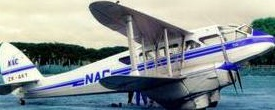

In [ ]:
# cv2.imread : 이미지파일 불러오기
img = cv2.imread(img_path)
img

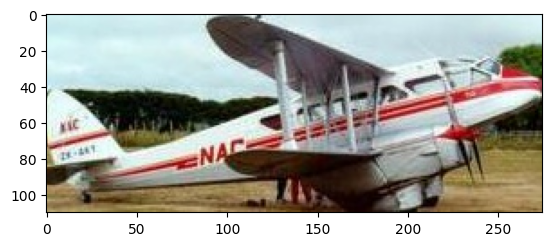

In [ ]:
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

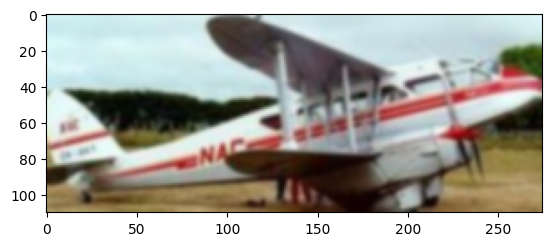

In [ ]:
# ===================================
# 가우시안 블러 필터
# ===================================
# 1. (5,5): 커널 크기. 반드시 홀수여야 함

# - 값이 클수록 더 뿌옇게 됨
# - 일반적으로 (3,3), (5,5), (7,7) 사용


# 2. 0: X, Y 방향의 표준편차
# - 0이면 커널 크기에 따라 자동 계산
# - 값이 클수록 블러 강도 증가-

gaussian = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))

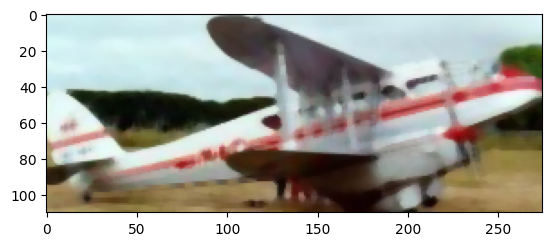

In [ ]:
# ===================================
# 미디안 필터 (소금-후추 노이즈 제거에 효과적)
# ===================================
# 5: 커널 크기. 반드시 홀수

# - 값이 클수록 노이즈 제거 강도 증가
# - 보통 3~7 사이 값 사용
# - 너무 크면 이미지 디테일 손실

median = cv2.medianBlur(img, 5)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))

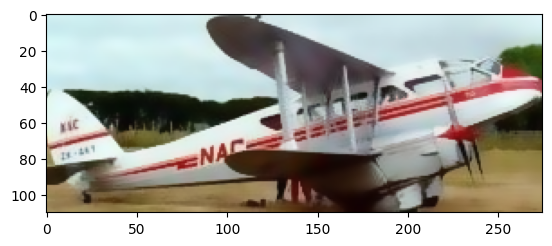

In [ ]:
# ===================================
# 바이래터럴 필터 (엣지 보존하면서 노이즈 제거)
# ===================================
# 1. 9: 픽셀 직경(d)
# - 각 픽셀 주변을 처리할 영역 크기
# - 값이 클수록 처리 시간 증가


# 2. 75: 색공간 시그마(sigmaColor)
# - 색상 차이에 대한 필터 강도
# - 값이 크면 더 먼 색상까지 블렌딩


# 3. 75: 좌표공간 시그마(sigmaSpace)
# - 거리에 대한 필터 강도
# - 값이 크면 더 먼 픽셀까지 영향

bilateral = cv2.bilateralFilter(img, 9, 75, 75)
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))

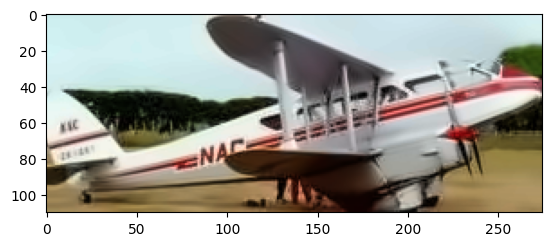

In [ ]:
# ===================================
# Non-local Means 디노이징
# ===================================
# 1. None: 결과 저장할 배열(자동 생성)

# 2. 10: 휘도(명도) 채널의 필터 강도(h)
# - 값이 클수록 노이즈 제거 강도 증가

# 3. 10: 컬러 채널의 필터 강도(hColor)
# - 값이 클수록 색상 블렌딩 강도 증가

# 4. 7: 템플릿 윈도우 크기
# - 픽셀 유사도를 비교할 패치 크기
# - 보통 7이나 9 사용

# 5. 21: 서치 윈도우 크기
# - 유사한 패치를 찾을 영역 크기
# - 값이 클수록 처리 시간 증가

nlm = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
plt.imshow(cv2.cvtColor(nlm, cv2.COLOR_BGR2RGB))

## add-noising

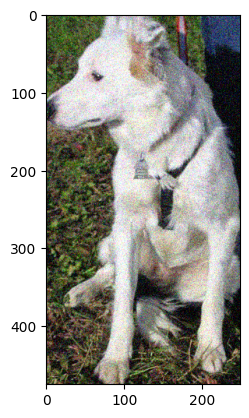

In [ ]:
# 1. 가우시안 노이즈 추가
row, col, ch = img.shape
mean = 0
sigma = 25
gauss = np.random.normal(mean, sigma, (row, col, ch))
noisy_gaussian = img + gauss
noisy_gaussian = np.clip(noisy_gaussian, 0, 255).astype(np.uint8)
plt.imshow(cv2.cvtColor(noisy_gaussian, cv2.COLOR_BGR2RGB))

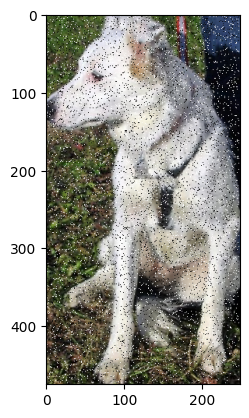

In [ ]:
# 2. 소금-후추 노이즈 추가
noise_ratio = 0.05  # 노이즈 비율 (5%)
noisy_sp = img.copy()
# 소금 노이즈 (흰색 점)
num_salt = np.ceil(noise_ratio * img.size * 0.33).astype(int)
coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
noisy_sp[coords[0], coords[1], :] = 255
# 후추 노이즈 (검은색 점)
num_pepper = np.ceil(noise_ratio * img.size * 0.33).astype(int)
coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
noisy_sp[coords[0], coords[1], :] = 0
plt.imshow(cv2.cvtColor(noisy_sp, cv2.COLOR_BGR2RGB))

## 문제
위 4가지 디노이징 기법과 2가지 애드노이징 기법을 각각 함수화하시오.

In [ ]:
img_path = '/content/dog.jpg'

array([[[ 31,  97,  72],
        [ 34, 100,  75],
        [ 29,  91,  67],
        ...,
        [109,  69,  50],
        [102,  62,  43],
        [100,  60,  41]],

       [[ 42, 107,  82],
        [ 46, 111,  85],
        [ 42, 104,  80],
        ...,
        [110,  70,  51],
        [104,  64,  45],
        [101,  61,  42]],

       [[ 46, 109,  83],
        [ 53, 114,  86],
        [ 53, 114,  88],
        ...,
        [110,  70,  51],
        [106,  66,  47],
        [102,  62,  43]],

       ...,

       [[ 71,  94,  96],
        [ 76, 100, 100],
        [ 74,  95,  97],
        ...,
        [ 14,  19,  22],
        [ 15,  20,  23],
        [  0,   4,   7]],

       [[ 82, 104, 102],
        [ 57,  79,  77],
        [ 29,  51,  49],
        ...,
        [ 27,  32,  35],
        [ 26,  31,  34],
        [ 16,  21,  24]],

       [[ 21,  43,  38],
        [  7,  30,  25],
        [  4,  27,  22],
        ...,
        [ 32,  37,  40],
        [ 26,  31,  34],
        [ 20,  27,  30]]], dtype=uint8)
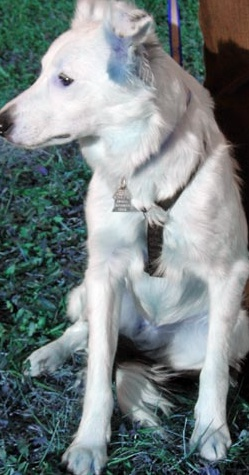

In [ ]:
img = cv2.imread(img_path)
img

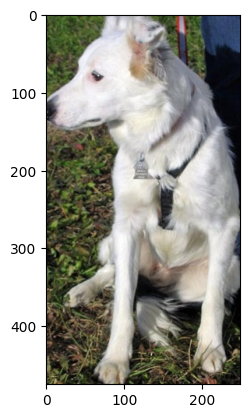

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
def gaussian():
    gaussian = cv2.GaussianBlur(img, (5,5), 0)
    plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))

def median():
    median = cv2.medianBlur(img, 5)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))

def bilateral():
    bilateral = cv2.bilateralFilter(img, 9, 75, 75)
    plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))

def Denoising():
    nlm = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    plt.imshow(cv2.cvtColor(nlm, cv2.COLOR_BGR2RGB))

def gaussian_added():
    row, col, ch = img.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_gaussian = img + gauss
    noisy_gaussian = np.clip(noisy_gaussian, 0, 255).astype(np.uint8)
    plt.imshow(cv2.cvtColor(noisy_gaussian, cv2.COLOR_BGR2RGB))

def setnoise_added():
    # 2. 소금-후추 노이즈 추가
    noise_ratio = 0.05  # 노이즈 비율 (5%)
    noisy_sp = img.copy()
    # 소금 노이즈 (흰색 점)
    num_salt = np.ceil(noise_ratio * img.size * 0.33).astype(int)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy_sp[coords[0], coords[1], :] = 255
    # 후추 노이즈 (검은색 점)
    num_pepper = np.ceil(noise_ratio * img.size * 0.33).astype(int)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy_sp[coords[0], coords[1], :] = 0
    plt.imshow(cv2.cvtColor(noisy_sp, cv2.COLOR_BGR2RGB))

def run_filters():
    print("=== 이미지 필터 선택 ===")
    print("1. Gaussian Blur")
    print("2. Median Blur")
    print("3. Bilateral Filter")
    print("4. Denoising")
    print("5. Gaussian Noise 추가")
    print("6. Salt & Pepper Noise 추가")
    print("0. 종료")

    while True:
        choice = input("번호 선택: ")

        if choice == '1':
            gaussian()
        elif choice == '2':
            median()
        elif choice == '3':
            bilateral()
        elif choice == '4':
            Denoising()
        elif choice == '5':
            gaussian_added()
        elif choice == '6':
            setnoise_added()
        elif choice == '0':
            print("종료합니다.")
            break
        else:
            print("잘못된 입력입니다. 다시 선택하세요.")

In [ ]:
run_filters()

=== 이미지 필터 선택 ===
1. Gaussian Blur
2. Median Blur
3. Bilateral Filter
4. Denoising
5. Gaussian Noise 추가
6. Salt & Pepper Noise 추가
0. 종료


KeyboardInterrupt: Interrupted by user

In [ ]:
gaussian_blur = lambda img : cv2.GaussianBlur(img, (5,5), 0)
median_blur = lambda img : cv2.medianBlur(img, 5)
bilateral_filter = lambda img : cv2.bilateralFilter(img, 9, 75, 75)
nlm_denoise = lambda img : cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)

In [ ]:
def guassian_noise(img):
    row, col, ch = img.shape
    mean = 0
    sigma = 25
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_gaussian = img + gauss
    noisy_gaussian = np.clip(noisy_gaussian, 0, 255).astype(np.uint8)
    return noisy_gaussian

def salt_peper_noise(img, noise_ratio=0.05):
    '''
        img : 입력 이미지
        noise_ratio : 노이즈 비율 (5%)'''
    noisy_sp = img.copy()
    # 소금 노이즈 (흰색 점)
    num_salt = np.ceil(noise_ratio * img.size * 0.33).astype(int)
    coords = [np.random.randint(0, i, num_salt) for i in img.shape]
    noisy_sp[coords[0], coords[1], :] = 255
    # 후추 노이즈 (검은색 점)
    num_pepper = np.ceil(noise_ratio * img.size * 0.33).astype(int)
    coords = [np.random.randint(0, i, num_pepper) for i in img.shape]
    noisy_sp[coords[0], coords[1], :] = 0
    return noisy_sp

In [ ]:
guassian_noise(img)

NameError: name 'guassian_noise' is not defined

array([[[243, 243, 213],
        [243, 243, 213],
        [245, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[242, 242, 212],
        [242, 242, 212],
        [244, 242, 212],
        ...,
        [248, 245, 224],
        [248, 245, 224],
        [248, 245, 224]],

       [[243, 241, 210],
        [242, 240, 209],
        [242, 240, 210],
        ...,
        [249, 244, 223],
        [250, 245, 224],
        [250, 245, 224]],

       ...,

       [[ 86, 131, 152],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 84, 135, 161],
        [ 91, 142, 168],
        [ 90, 139, 165]],

       [[101, 147, 165],
        [255, 255, 255],
        [100, 148, 166],
        ...,
        [ 57, 105, 133],
        [ 71, 119, 147],
        [ 76, 123, 151]],

       [[108, 154, 171],
        [  0,   0,   0],
        [116, 164, 182],
        ...,
        [ 82, 129, 157],
        [ 91, 138, 166],
        [ 90, 137, 165]]], dtype=uint8)
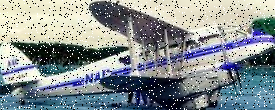

In [ ]:
salt_peper_noise(img)

## 문제
- 이미지를 입력받고, 4개의 디노이징 기법 중 임의로 하나를 선택하여 적용하는 random_denoise 함수를 만드시오.
- 이미지를 입력받고,` 2개의 애드노이징 기법 중 임의로 하나를 선택하여 적용하는 random_addnoise 함수를 만드시오.

In [ ]:
import random
random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

3

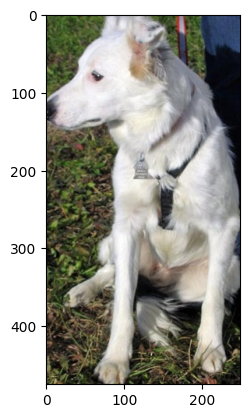

In [ ]:
img_path = '/content/dog.jpg'
img = cv2.imread(img_path)
img
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))



In [ ]:
denoises = {'gaussian_blur': gaussian_blur,
            'median_blur': median_blur,
            'bilateral_filter': bilateral_filter,
            'nlm_denoise': nlm_denoise}
denoises

NameError: name 'gaussian_blur' is not defined

In [ ]:
def random_denoise(img):
    denoises = {'gaussian_blur': gaussian_blur,
                'median_blur': median_blur,
                'bilateral_filter': bilateral_filter,
                'nlm_denoise': nlm_denoise}

    # key 선택
    selected = random.choice(list(denoises)) # key list

    # 선택된 key로 해당 모듈(value) 지정-> 실행
    denoised = denoises[selected](img)
    return selected, denoised

module_name, denoised = random_denoise(img)

In [ ]:
module_name

'gaussian_blur'

array([[[243, 243, 213],
        [243, 243, 213],
        [243, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[243, 242, 212],
        [243, 242, 212],
        [243, 242, 212],
        ...,
        [249, 245, 224],
        [249, 245, 224],
        [249, 245, 224]],

       [[242, 241, 210],
        [242, 240, 210],
        [242, 240, 210],
        ...,
        [248, 245, 223],
        [249, 245, 224],
        [249, 245, 224]],

       ...,

       [[ 86, 131, 152],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 85, 136, 161],
        [ 86, 137, 162],
        [ 89, 137, 164]],

       [[101, 147, 165],
        [100, 147, 165],
        [100, 146, 164],
        ...,
        [ 82, 129, 157],
        [ 84, 135, 161],
        [ 90, 137, 165]],

       [[108, 154, 171],
        [108, 154, 171],
        [108, 154, 171],
        ...,
        [ 78, 129, 155],
        [ 84, 135, 161],
        [ 90, 137, 165]]], dtype=uint8)
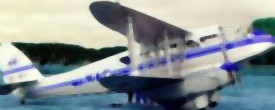

In [ ]:
denoised

In [ ]:
def random_addnoise(img):
    addnoises = {'guassian_noise': guassian_noise,
                'salt_peper_noise': salt_peper_noise}

    # key 선택
    selected = random.choice(list(addnoises)) # key list

    # 선택된 key로 해당 모듈(value) 지정-> 실행
    addnoised = addnoises[selected](img)
    return selected, addnoised

module_name, addnoised = random_addnoise(img)

['guassian_noise', 'salt_peper_noise']


In [ ]:
module_name

'guassian_noise'

array([[[243, 243, 213],
        [243, 243, 213],
        [245, 243, 213],
        ...,
        [249, 246, 225],
        [249, 246, 225],
        [249, 246, 225]],

       [[242, 242, 212],
        [242, 242, 212],
        [244, 242, 212],
        ...,
        [248, 245, 224],
        [248, 245, 224],
        [248, 245, 224]],

       [[243, 241, 210],
        [255, 255, 255],
        [242, 240, 210],
        ...,
        [249, 244, 223],
        [250, 245, 224],
        [250, 245, 224]],

       ...,

       [[255, 255, 255],
        [ 85, 130, 151],
        [ 83, 128, 149],
        ...,
        [ 84, 135, 161],
        [ 91, 142, 168],
        [ 90, 139, 165]],

       [[101, 147, 165],
        [100, 146, 164],
        [100, 148, 166],
        ...,
        [ 57, 105, 133],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[108, 154, 171],
        [108, 154, 171],
        [255, 255, 255],
        ...,
        [ 82, 129, 157],
        [ 91, 138, 166],
        [  0,   0,   0]]], dtype=uint8)
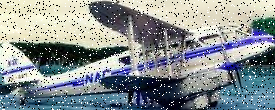

In [ ]:
addnoised